<b> Step 1: Import Libraries

In [337]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # used for linear algebra
import pandas as pd # used for data processing
import matplotlib.pyplot as plt # used for the plot the graph 
import seaborn as sns # used for plot interactive graph
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

#to data preprocessing
from sklearn.preprocessing import LabelEncoder #convert numerical categorical variables into binary vectors

#NLP tools
import nltk
nltk.download('wordnet')
from nltk import stem
nltk.download('punkt')
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer


#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud as WC

from collections import Counter

import tensorflow as tf
import transformers

#pip install transformers
#pip install wordcloud
#pip install contractions
#pip install regex


[nltk_data] Downloading package wordnet to /Users/nup/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nup/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/nup/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<b> Step 2: Read, Understand & Pre-process Train/Test Data

In [339]:
print("Dataset:")
print("============= \n")

df = pd.read_csv('hate_speech.tsv', sep='\t')
df.head()

Dataset:



Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...                                                                               
1  Doctor  sab sahi me ke PhD (in hate politics) ...                                                                               
2  Poore Desh me Patel OBC me aate Hain sirf gujr...                                                                               
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...                                                                               
4      Hate it jab test ata ho phr bh acha na ho -.-                                                                               

    no  
0   no  
1   no  
2   no  
3  yes  
4  yes

In [340]:
dict = {'Knowing ki Vikas kitna samjhata hai Priyanka aur Itch Guard Luv ko, usne bola tha Ben wali baat me ab Sallu ne bhi agree kiya!': 'Tweet','no':'Class'}

In [341]:
df.rename(columns = dict,inplace = True)
df.head()

Tweet Class
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes
4      Hate it jab test ata ho phr bh acha na ho -.-   yes

In [342]:
df['Class'].value_counts()

no     2913
yes    1661
on        2
n         2
Name: Class, dtype: int64

In [343]:
df['Class'].mask(df['Class'] == 'n','no',inplace=True)
df.head()

Tweet Class
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes
4      Hate it jab test ata ho phr bh acha na ho -.-   yes

In [344]:
df['Class'].mask(df['Class'] == 'on','no',inplace=True)
df.head()

Tweet Class
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes
4      Hate it jab test ata ho phr bh acha na ho -.-   yes

In [345]:
df['Class'].value_counts()

no     2917
yes    1661
Name: Class, dtype: int64

In [346]:
df.describe().T

count unique                                                top  freq
Tweet  4577   4577  Muze bhi lgta hai...Achha hua yr yehi dono hue...     1
Class  4578      2                                                 no  2917

In [347]:
''' 
    /*----------------------------- TRANSFORM_OUTPUT_LABEL ----------------
    | Function  : Transform()
    | Purpose   : Transform Output (Categorical) into Numerical Representation 
    | Arguments : 
    |  Attribute: Target values
    | Return    :
    |  Attribute: Numerical Representation
    *-----------------------------------------------------------------------*/
'''

# Transform the Output Attribute of Data into Numerical Representation
labelencoder = LabelEncoder()
df['Label'] = labelencoder.fit_transform(df['Class'])
df.head()

Tweet Class  Label
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no      0
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no      0
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no      0
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes      1
4      Hate it jab test ata ho phr bh acha na ho -.-   yes      1

In [348]:
#distributions
df_Stat=df[['Label','Tweet']].groupby('Label').count().reset_index()
df_Stat.columns=['Label','count']
df_Stat['percentage']=(df_Stat['count']/df_Stat['count'].sum())*100
df_Stat

Label  count  percentage
0      0   2917   63.731702
1      1   1660   36.268298

In [349]:
#To check the null value in ham dataframe
df.isnull().sum()

Tweet    1
Class    0
Label    0
dtype: int64

In [350]:
#To check if any duplicate value in ham dataframe 
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4573    False
4574    False
4575    False
4576    False
4577    False
Length: 4578, dtype: bool


In [351]:
#create a copy of the original data to add the extra count columns
df_count = df.copy()
df_count.head()

Tweet Class  Label
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no      0
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no      0
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no      0
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes      1
4      Hate it jab test ata ho phr bh acha na ho -.-   yes      1

<b> Data Pre-processing and Cleaning

In [352]:
# word_count
df_count['word_count'] = df_count['Tweet'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_count['unique_word_count'] = df_count['Tweet'].apply(lambda x: len(set(str(x).split())))

# url_count
df_count['url_count'] = df_count['Tweet'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# char_count
df_count['char_count'] = df_count['Tweet'].apply(lambda x: len(str(x)))

# punctuation_count
df_count['punctuation_count'] = df_count['Tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_count['hashtag_count'] = df_count['Tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_count['mention_count'] = df_count['Tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))



In [353]:
df_count.head()

Tweet Class  Label  word_count  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no      0          41   
1  Doctor  sab sahi me ke PhD (in hate politics) ...    no      0          29   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...    no      0          49   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes      1          25   
4      Hate it jab test ata ho phr bh acha na ho -.-   yes      1          12   

   unique_word_count  url_count  char_count  punctuation_count  hashtag_count  \
0                 39          0         196                  8              2   
1                 28          0         166                  9              0   
2                 42          0         257                  1              0   
3                 24          0         140                  4              0   
4                 11          0          45                  3              0   

   mention_count  
0              0  
1              0  
2              0  
3              0  
4              0

<b> Text Cleaning

In [354]:
# Tweet from which we want to extract emojis
text = df['Tweet']
a = str(text)
# Using regular expression to find and extract all emojis from the tweet
emojis = re.findall(r'[^\w\⁠s,. ]', a)
print(emojis)

['\n', '(', ')', '\n', '\n', '\n', '-', '-', '\n', '\n', '\n', '\n', '\n', '\n', '\n', ':', ':', ':']


In [355]:
# Function to remove emoji from Tweet
def removeEmoji(a):
    regrex_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F" # emoticons
    u"\U0001F300-\U0001F5FF" # symbols & pictographs
    u"\U0001F680-\U0001F6FF" # transport & map symbols
    u"\U0001F1E0-\U0001F1FF" # flags (iOS)
    u"\U00002702-\U000027B0F" 
    u"\U00002500-\U00002BEF" #chinese char
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
    u"\U0001F600" # grinning face
    u"\U0001F601" # beaming face with smiling eyes
    u"\U0001F605" # grinning face with sweat
    u"\U0001F923" # rolling on the floor laughing
    u"\U0001F602" # face with tears of joy
    u"\U0001F642" # slightly smiling face
    u"\U0001F607" # smiling face with halo
    u"\U0001F60D" # smiling face with heart-eyes
    u"\U0001F910" # zipper-mouth face
    u"\U0001F612" # unamused face
    "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',a)
# Printing the Tweet without emojis
print(removeEmoji(a))

0       I am Muhajir .. Aur mere lye sab se Pehly Paki...
1       Doctor  sab sahi me ke PhD (in hate politics) ...
2       Poore Desh me Patel OBC me aate Hain sirf gujr...
3       Sarkar banne ke bad Hindu hit me ek bhi faisla...
4           Hate it jab test ata ho phr bh acha na ho -.-
                              ...                        
4573    ye attankwadi Indian agent hai jo terrorism ph...
4574    bola na terrorism ko support karna band karoge...
4575    lagta hai aap ne movie dekhi hai which is writ...
4576    tum log terrorism ko support karna band kardo ...
4577    mujhe pehele se hi pata tha so Sallu fans ke b...
Name: Tweet, Length: 4578, dtype: object


In [356]:
def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english")) + ['subject', 'forward','cc','re','ect','thanks','reply']
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

In [357]:
def process_tweet(Tweet):
    
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub('\\n',' ',str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub("\d","",str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'\W',' ',str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'\s+',' ',str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\’", "\'", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"dont", "do not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'re", " are", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'s", " is", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\’d", " would", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\d", " would", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'t", " not", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'m", " am", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\n", "", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\r", "", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\'", "", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r"\"", "", str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
    df['Tweet'] = df['Tweet'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
    df['Tweet'] = df['Tweet'].apply(lambda x: remove_stopwords(x))
    return Tweet

In [358]:
df['Processed_Tweet'] = df['Tweet'].apply(process_tweet)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...  
1  Doctor  sab sahi me ke PhD (in hate politics) ...  
2  Poore Desh me Patel OBC me aate Hain sirf gujr...  
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...  
4      Hate it jab test ata ho phr bh acha na ho -.-

In [359]:
def clean_tweet(Tweet):
    '''make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    Tweet = Tweet.lower()
    Tweet = re.sub('\[.*?\]', '', Tweet)
    Tweet = re.sub('[%s]' % re.escape(string.punctuation), '', Tweet)
    Tweet = re.sub('\w*\d\w*', '', Tweet)
    Tweet = re.sub('[‘’“”…]', '', Tweet)
    Tweet = re.sub('\n', '', Tweet)
    Tweet = re.sub('user ', '', Tweet)
    Tweet = re.sub('amp ', '', Tweet)
    Tweet = re.sub('like ', '', Tweet)
    Tweet = re.sub('new ', '', Tweet)
    Tweet = re.sub('people ', '', Tweet)
    Tweet = re.sub('bihday', 'birthday', Tweet)
    Tweet = re.sub('allahsoil', 'allah soil', Tweet)
    return Tweet

In [360]:
df['Cleaned_Tweet'] = df['Tweet'].apply(lambda x: clean_tweet(x))
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  
0  muhajir aur mere lye sab se pehly pakistan agr...  
1  doctor sab sahi ke phd hate politics wale bhai...  
2  poore desh patel obc aate hain sirf gujrat ko ...  
3  sarkar banne ke bad hindu hit ek bhi faisla jo...  
4             hate jab test ata ho phr bh acha na ho

In [361]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['Tokenized'] = df['Tweet'].apply(tokenizer.tokenize)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...  
1  [doctor, sab, sahi, ke, phd, hate, politics, w...  
2  [poore, desh, patel, obc, aate, hain, sirf, gu...  
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...  
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]

In [362]:
#Removal of urls, hashtags and user handles
def links(Tweet):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, Tweet)
    for link in links:
        Tweet = Tweet.replace(link[0], ', ')    
    return Tweet

def handles(Tweet):
    tags = ['@','#']
    for separator in  string.punctuation:
        if separator not in tags :
            Tweet = Tweet.replace(separator,' ')
    words = []
    for word in Tweet.split():
        word = word.strip()
        if word:
            if word[0] not in tags:
                words.append(word)
    return ' '.join(words)

In [363]:
df['Links'] =df['Tweet'].apply(links)
df['Handles'] =df['Tweet'].apply(handles)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  
0  muhajir aur mere lye sab se pehly pakistan agr...  
1  doctor sab sahi ke phd hate politics wale bhai...  
2  poore desh patel obc aate hain sirf gujrat ko ...  
3  sarkar banne ke bad hindu hit ek bhi faisla jo...  
4             hate jab test ata ho phr bh acha na ho

In [364]:
# remove whitespace from tweet
def remove_whitespace(Tweet):
    return  " ".join(Tweet.split())

df['Removed_Whitespace'] =df['Tweet'].apply(remove_whitespace)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  
0  muhajir aur mere lye sab se pehly pakistan agr...  
1  doctor sab sahi ke phd hate politics wale bhai...  
2  poore desh patel obc aate hain sirf gujrat ko ...  
3  sarkar banne ke bad hindu hit ek bhi faisla jo...  
4             hate jab test ata ho phr bh acha na ho

In [365]:
#Replace contractions in string of text
import contractions
def replace_contractions(text):
    
    return contractions.fix(text)

df['Replaced_Cont'] =df['Tweet'].apply(replace_contractions)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                       Replaced_Cont  
0  muhajir aur mere lye sab se pehly pakistan agr...  
1  doctor sab sahi ke phd hate politics wale bhai...  
2  poore desh patel obc aate hain sirf gujrat ko ...  
3  sarkar banne ke bad hindu hit ek bhi faisla jo...  
4             hate jab test ata ho phr bh acha na ho

In [366]:
def snowball_text(Tweet):
    
    words = ""
    # Create the stemmer.
    stemmer = SnowballStemmer("english")
     # Split tweet into words.
    Tweet = Tweet.split()
   
    for word in Tweet:
        words = words + stemmer.stem(word) + " "
    return words

df['Snowball_Tweet'] =df['Tweet'].apply(snowball_text)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                       Replaced_Cont  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                      Snowball_Tweet  
0  muhajir aur mere lye sab se peh pakistan agr l...  
1  doctor sab sahi ke phd hate polit wale bhai pa...  
2  poor desh patel obc aat hain sirf gujrat ko ch...  
3  sarkar bann ke bad hindu hit ek bhi faisla jo ...  
4            hate jab test ata ho phr bh acha na ho

In [367]:
def lemmatize_verbs(words): #same as removed non-alphanumeric
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

df['Lemmatized_Tweet'] =df['Tweet'].apply(lemmatize_verbs)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                       Replaced_Cont  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                      Snowball_Tweet  \
0  muhajir aur mere lye sab se peh pakistan agr l...   
1  doctor sab sahi ke phd hate polit wale bhai pa...   
2  poor desh patel obc aat hain sirf gujrat ko ch...   
3  sarkar bann ke bad hindu hit ek bhi faisla jo ...   
4            hate jab test ata ho phr bh acha na ho    

                                    Lemmatized_Tweet  
0  [m, u, h, a, j, i, r,  , a, u, r,  , m, e, r, ...  
1  [d, o, c, t, o, r,  , s, a, b,  , s, a, h, i, ...  
2  [p, o, o, r, e,  , d, e, s, h,  , p, a, t, e, ...  
3  [s, a, r, k, a, r,  , b, a, n, n, e,  , k, e, ...  
4  [h, a, t, e,  , j, a, b,  , t, e, s, t,  , a, ...

In [368]:
#adding new column length of tweet in dataset
df['Tweet_Len'] = df.Tweet.apply(len)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                       Replaced_Cont  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                      Snowball_Tweet  \
0  muhajir aur mere lye sab se peh pakistan agr l...   
1  doctor sab sahi ke phd hate polit wale bhai pa...   
2  poor desh patel obc aat hain sirf gujrat ko ch...   
3  sarkar bann ke bad hindu hit ek bhi faisla jo ...   
4            hate jab test ata ho phr bh acha na ho    

                                    Lemmatized_Tweet  Tweet_Len  
0  [m, u, h, a, j, i, r,  , a, u, r,  , m, e, r, ...        157  
1  [d, o, c, t, o, r,  , s, a, b,  , s, a, h, i, ...        151  
2  [p, o, o, r, e,  , d, e, s, h,  , p, a, t, e, ...        244  
3  [s, a, r, k, a, r,  , b, a, n, n, e,  , k, e, ...        136  
4  [h, a, t, e,  , j, a, b,  , t, e, s, t,  , a, ...         38

In [369]:
from textblob import TextBlob
def getSubjectivity(Tweet) :
    return TextBlob(Tweet).sentiment.subjectivity
def getPolarity(Tweet) :
    return TextBlob(Tweet).sentiment.polarity
def getAnalysis(score) :
    if score==0:
        return 'Neutral'
    if score<0:
        return 'Negative'
    return 'Positive'

In [370]:
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)
df['Sentiment_Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

Tweet Class  Label  \
0  muhajir aur mere lye sab se pehly pakistan agr...    no      0   
1  doctor sab sahi ke phd hate politics wale bhai...    no      0   
2  poore desh patel obc aate hain sirf gujrat ko ...    no      0   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   yes      1   
4             hate jab test ata ho phr bh acha na ho   yes      1   

                                     Processed_Tweet  \
0  I am Muhajir .. Aur mere lye sab se Pehly Paki...   
1  Doctor  sab sahi me ke PhD (in hate politics) ...   
2  Poore Desh me Patel OBC me aate Hain sirf gujr...   
3  Sarkar banne ke bad Hindu hit me ek bhi faisla...   
4      Hate it jab test ata ho phr bh acha na ho -.-   

                                       Cleaned_Tweet  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                           Tokenized  \
0  [muhajir, aur, mere, lye, sab, se, pehly, paki...   
1  [doctor, sab, sahi, ke, phd, hate, politics, w...   
2  [poore, desh, patel, obc, aate, hain, sirf, gu...   
3  [sarkar, banne, ke, bad, hindu, hit, ek, bhi, ...   
4  [hate, jab, test, ata, ho, phr, bh, acha, na, ho]   

                                               Links  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                             Handles  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                  Removed_Whitespace  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                       Replaced_Cont  \
0  muhajir aur mere lye sab se pehly pakistan agr...   
1  doctor sab sahi ke phd hate politics wale bhai...   
2  poore desh patel obc aate hain sirf gujrat ko ...   
3  sarkar banne ke bad hindu hit ek bhi faisla jo...   
4             hate jab test ata ho phr bh acha na ho   

                                      Snowball_Tweet  \
0  muhajir aur mere lye sab se peh pakistan agr l...   
1  doctor sab sahi ke phd hate polit wale bhai pa...   
2  poor desh patel obc aat hain sirf gujrat ko ch...   
3  sarkar bann ke bad hindu hit ek bhi faisla jo ...   
4            hate jab test ata ho phr bh acha na ho    

                                    Lemmatized_Tweet  Tweet_Len  Subjectivity  \
0  [m, u, h, a, j, i, r,  , a, u, r,  , m, e, r, ...        157         0.750   
1  [d, o, c, t, o, r,  , s, a, b,  , s, a, h, i, ...        151         0.900   
2  [p, o, o, r, e,  , d, e, s, h,  , p, a, t, e, ...        244         0.000   
3  [s, a, r, k, a, r,  , b, a, n, n, e,  , k, e, ...        136         0.625   
4  [h, a, t, e,  , j, a, b,  , t, e, s, t,  , a, ...         38         0.900   

   Polarity Sentiment_Analysis  
0  0.150000           Positive  
1 -0.800000           Negative  
2  0.000000            Neutral  
3 -0.141667           Negative  
4 -0.800000           Negative

<b> Exploratory Data Analysis

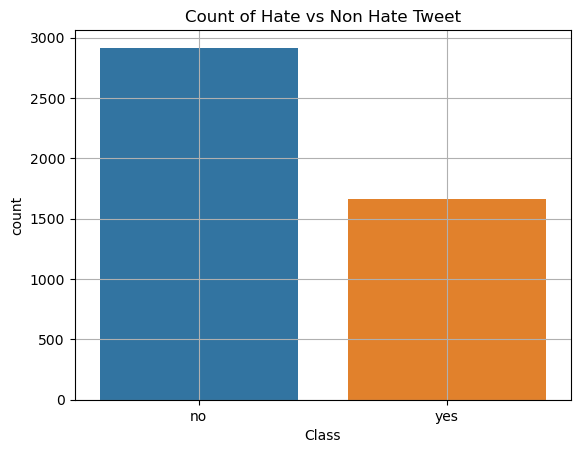

In [371]:
#plot of the count of hate and non-hate tweet
sns.countplot(df['Class'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

There are more non-hate speeches than the hatespeech in the dataset

<b> Top Terms in the Tweets

In [372]:
#from collections import Counter
results = Counter()
df['Tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[(' ', 80579), ('a', 68304), ('i', 31820), ('h', 29942), ('e', 28931), ('r', 22466), ('k', 20578), ('t', 19091), ('n', 18760), ('o', 17029)]


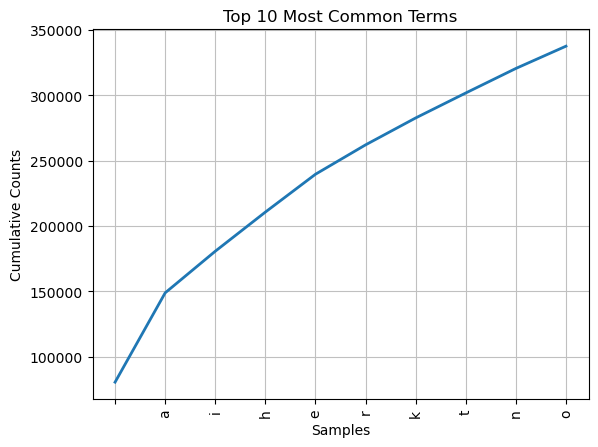

In [373]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

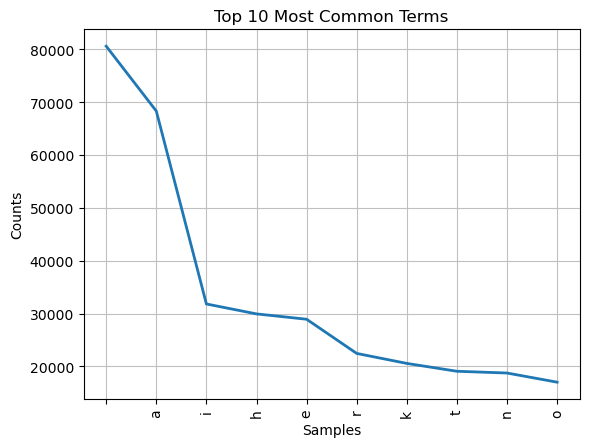

In [374]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

'' is the most frequently used word followed by 'a', 'i','e' etc. This is expected as there are more non hate tweets than hate tweets in the dataset

In [375]:
def get_wordcloud(tweet):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(tweet)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [376]:
#from wordcloud import WordCloud as WC
Total_Words = ''.join([words for words in df['Tweet']])
wordcloud = WC(width = 800, height = 400, random_state = 30, max_font_size = 120).generate(Total_Words)


pos_train_ds = df[df['Class'] == "yes"]
Pos_Tweets = ''.join([words for words in pos_train_ds['Tweet']])
pos_wordcloud = WC(width = 800, height = 400, random_state = 30, max_font_size = 120).generate(Pos_Tweets)

neg_train_ds = df[df['Class'] == "no"]
Neg_Tweets = ''.join([words for words in neg_train_ds['Tweet']])
neg_wordcloud = WC(width = 800, height = 400, random_state = 30, max_font_size = 120).generate(Neg_Tweets)

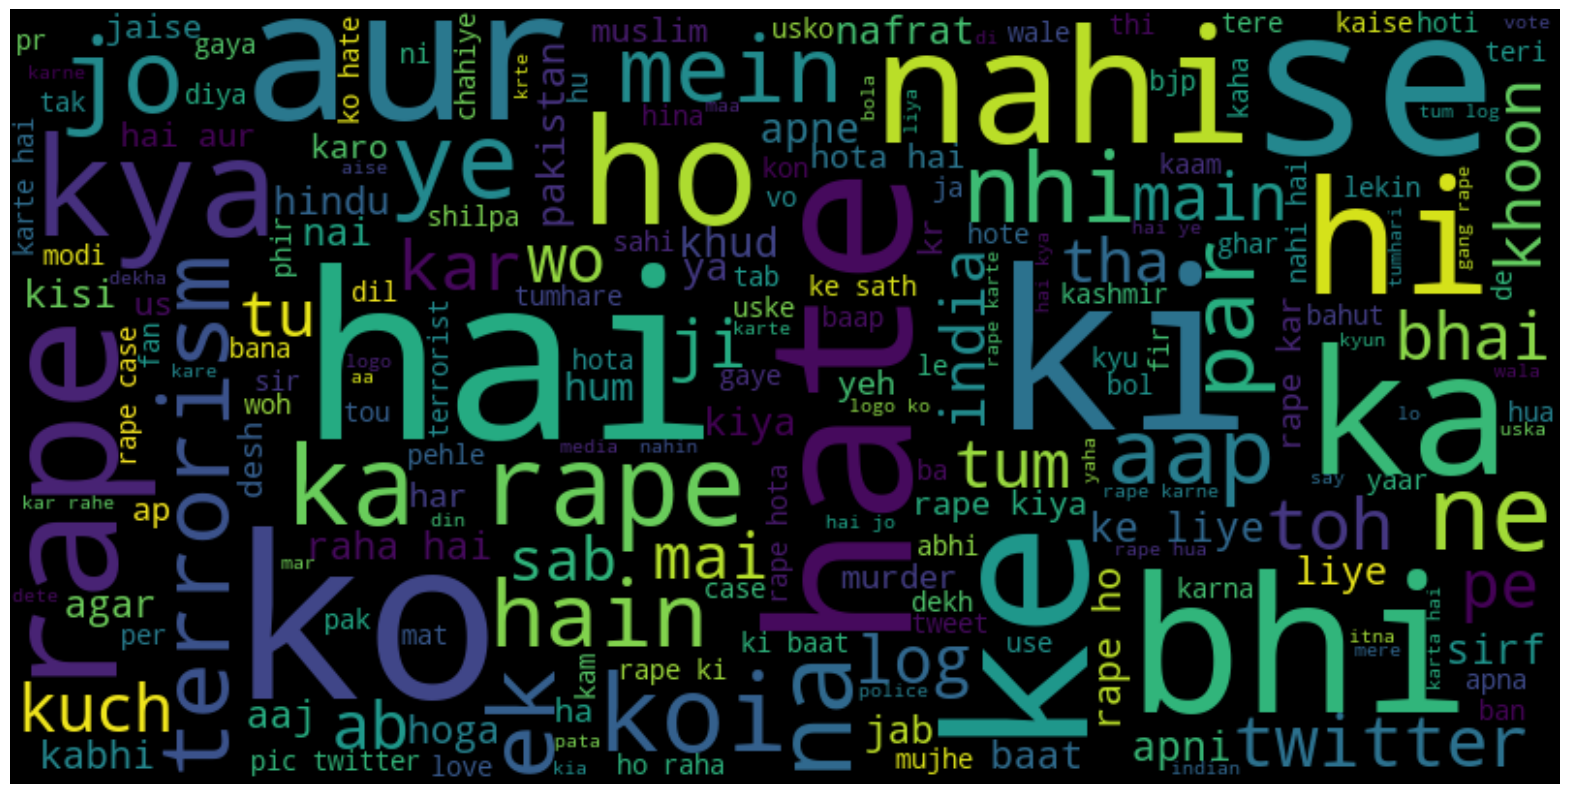

In [377]:
#import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (20,25))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

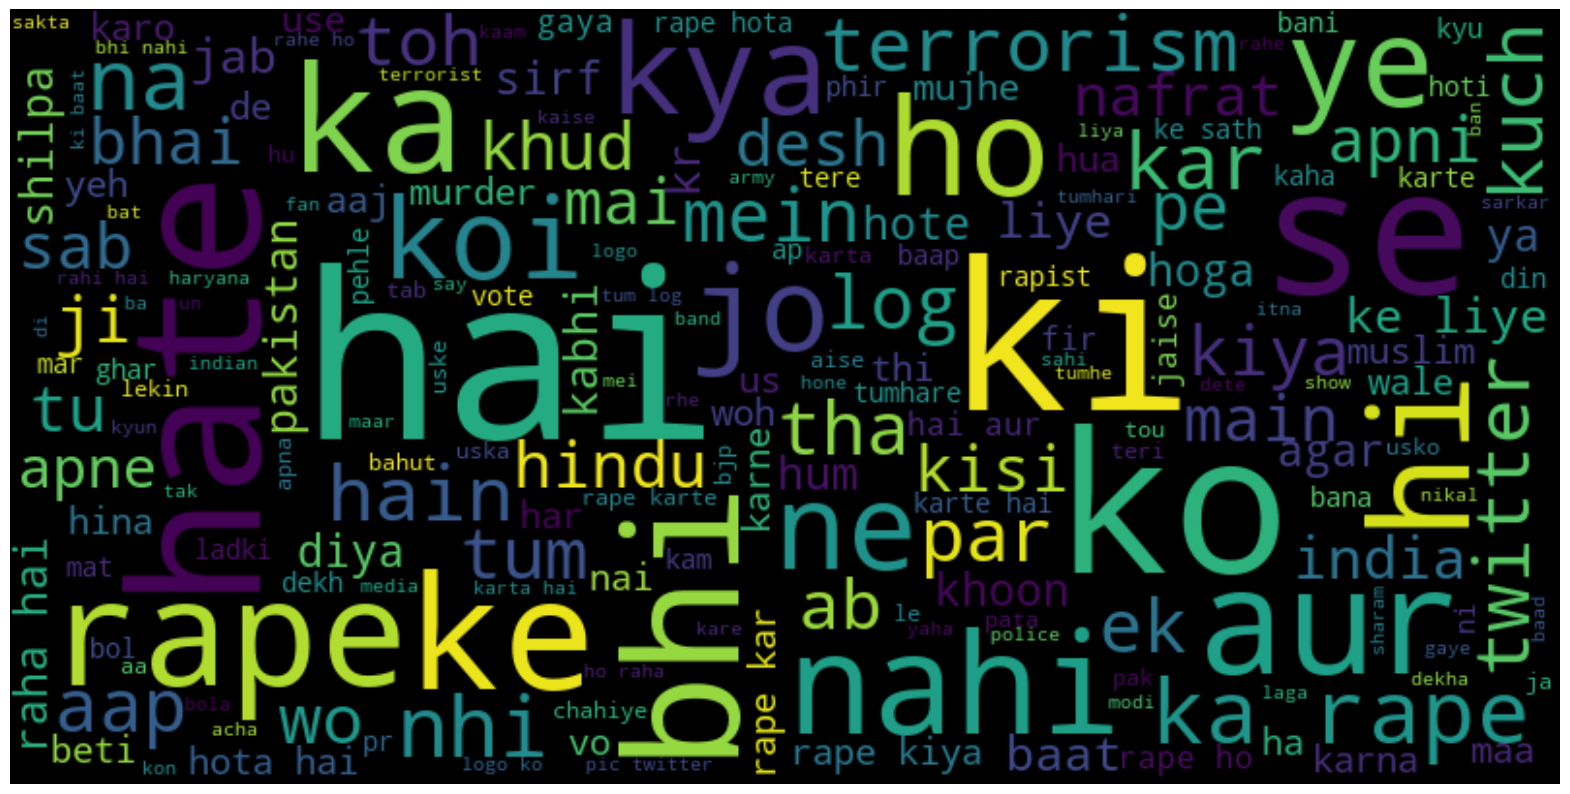

In [378]:
plt.figure(figsize = (20,25))
plt.imshow(pos_wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

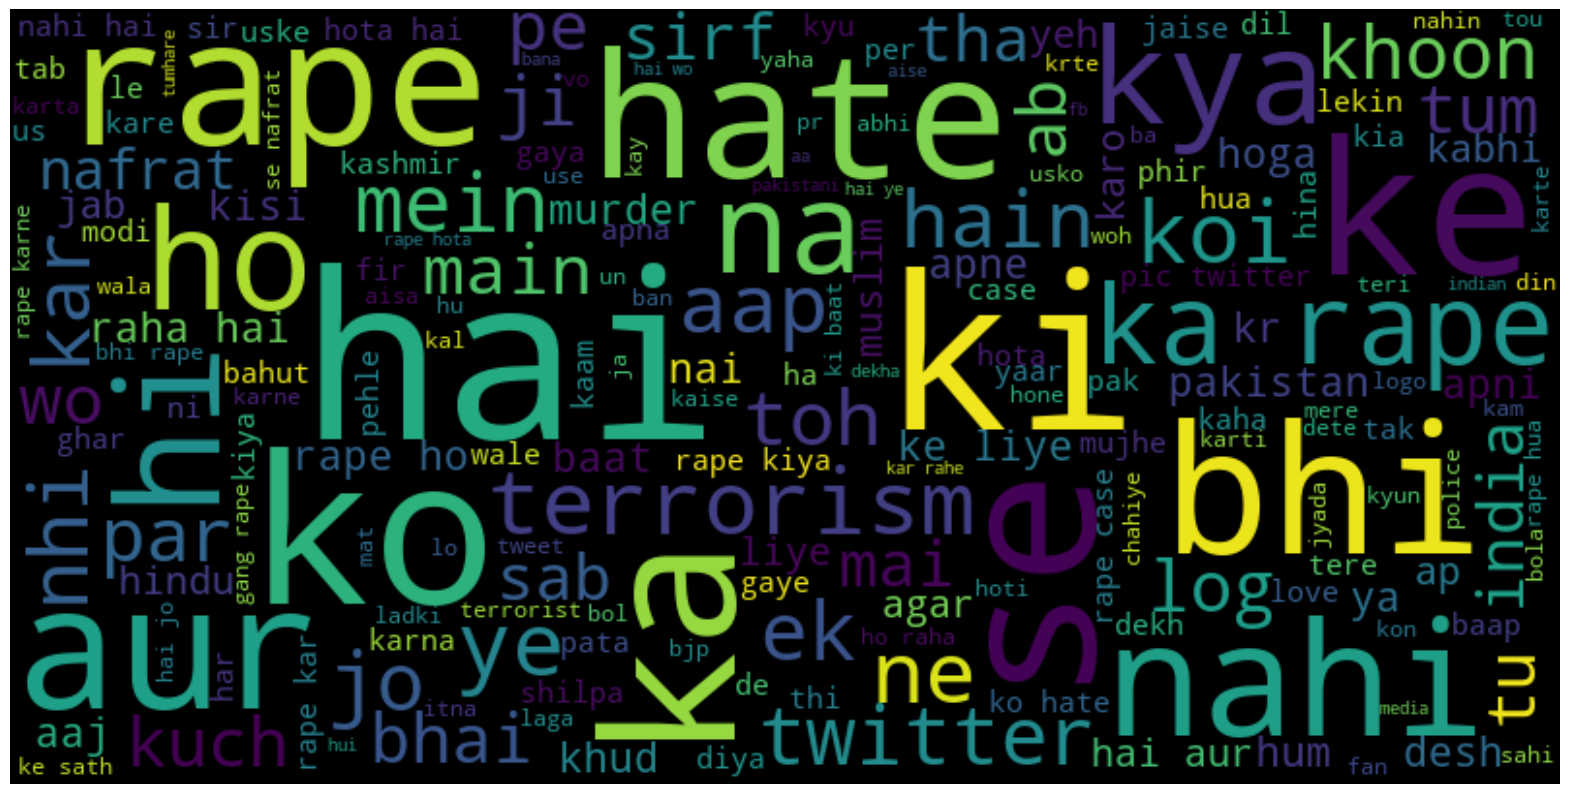

In [379]:
plt.figure(figsize = (20,25))
plt.imshow(neg_wordcloud , interpolation = "bilinear")
plt.axis('off')
plt.show()

<b> Model Building

<b> Hate Speech

In [380]:
#split the data into 70% training and 30% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], random_state = 22, test_size = 0.3)

In [381]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (3204,) (3204,)
Testing Data Shape: (1374,) (1374,)


In [382]:
#combining x and y training into one
training_set=pd.concat([X_train,y_train],axis=1)
training_set

Tweet  Label
4553  yami ka rape hote dikhaya gya hai kaabil kripy...      0
32    aap log kabhi america ki dalali karto kabhi na...      0
2653  bato agar tumhara bahan ko koi rape karke murd...      0
346   tuk gaya na jo ruk gaya woh terrorism kaise hu...      0
1318  rape ke liye prog karna hai akhlesh ko vote de...      1
...                                                 ...    ...
989   paas ke gaon mein londo ka scorpio mein uthake...      0
2527                              yayyyyyy koi aya hate      0
2952  tum mahila nari ladki ke naam par kala haryana...      1
356   hadd toh tab hogayi jab uski frnd ne bola ki a...      0
2933  hina ki wakil hate sambhavna ji aap ne shilpa ...      1

[3204 rows x 2 columns]

In [383]:
#combining x and y test into one
test_set=pd.concat([X_test,y_test],axis=1)
test_set

Tweet  Label
1593   hrithik ne ekdum gentle rape kiya salute hrithik      0
2945  sari duniya hate karti islamic desh nhi hota a...      0
1676  baise hi hai kai si aurto ka rape krte waqt ja...      0
1164  agar reliancejio relianceent apna broadband la...      0
2584  talaq per kanoon badal sakta hai rape per nahi...      0
...                                                 ...    ...
3343  bhai haar gaye toh haar gaye ky usme ab jadeja...      0
4522  hate ihrithikroshann ihrithik peso liye kisi k...      1
1136  jaa tera makaan uske baam karde bhashan dene s...      1
2280  sahi hi toh boli hain rape ke bina koi aaj net...      0
2658  charlie azadi charkhe se nehin balki lakho pra...      1

[1374 rows x 2 columns]

In [384]:
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [385]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = transformer.fit_transform(X_train_counts)

In [386]:
print(X_train_counts.shape)
print(X_train_tfidf.shape)

(3204, 11204)
(3204, 11204)


In [387]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = transformer.transform(X_test_counts)

In [388]:
print(X_test_counts.shape)
print(X_test_tfidf.shape)

(1374, 11204)
(1374, 11204)


In [389]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_estimators=500)

In [200]:
predictions = model.predict(X_test_tfidf)

In [201]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[824,  28],
       [462,  60]])

In [202]:
train_counts = count_vect.fit_transform(training_set['Tweet'])
test_counts = count_vect.transform(test_set['Tweet'])

In [203]:
print(train_counts.shape)
print(test_counts.shape)

(3204, 11204)
(1374, 11204)


In [204]:
train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)

In [205]:
model.fit(train_tfidf,training_set['Label'])

RandomForestClassifier(n_estimators=500)

In [206]:
predictions = model.predict(test_tfidf)

In [207]:
final_result1 = pd.DataFrame({'Text':test_set['Tweet'],'Label':predictions})
final_result1.to_csv('File_1.csv',index=False)

In [208]:
final_result1.head()

Text  Label
1593   hrithik ne ekdum gentle rape kiya salute hrithik      0
2945  sari duniya hate karti islamic desh nhi hota a...      0
1676  baise hi hai kai si aurto ka rape krte waqt ja...      0
1164  agar reliancejio relianceent apna broadband la...      0
2584  talaq per kanoon badal sakta hai rape per nahi...      0

In [209]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       852
           1       0.71      0.11      0.20       522

    accuracy                           0.65      1374
   macro avg       0.68      0.54      0.48      1374
weighted avg       0.67      0.65      0.55      1374

[[828  24]
 [463  59]]


In [211]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
predictions = model.predict(test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

final_result2 = pd.DataFrame({'Text':test_set['Tweet'],'Label':predictions})
final_result2.to_csv('File_2.csv',index=False)

In [212]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       852
           1       0.66      0.18      0.29       522

    accuracy                           0.65      1374
   macro avg       0.66      0.56      0.53      1374
weighted avg       0.66      0.65      0.59      1374

[[804  48]
 [427  95]]


<b> Sentiment Analysis

In [121]:
model.fit(train_tfidf,training_set['Sentiment_Analysis'])

RandomForestClassifier(n_estimators=500)

In [394]:
#split the data into 70% training and 30% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Analysis'], 
                                                    random_state = 22, test_size = 0.3)
training_set=pd.concat([X_train,y_train],axis=1)
test_set=pd.concat([X_test,y_test],axis=1)

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = transformer.transform(X_test_counts)

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_tfidf,y_train)

predictions = model.predict(X_test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

train_counts = count_vect.fit_transform(training_set['Tweet'])
test_counts = count_vect.transform(test_set['Tweet'])

train_tfidf = transformer.fit_transform(train_counts)
test_tfidf = transformer.transform(test_counts)


In [396]:
predictions = model.predict(test_tfidf)
print(classification_report(y_test,predictions))
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.98      0.85      0.91       438
     Neutral       0.85      1.00      0.92       809
    Positive       0.92      0.28      0.42       127

    accuracy                           0.89      1374
   macro avg       0.92      0.71      0.75      1374
weighted avg       0.90      0.89      0.87      1374

              precision    recall  f1-score   support

    Negative       0.98      0.85      0.91       438
     Neutral       0.85      1.00      0.92       809
    Positive       0.92      0.28      0.42       127

    accuracy                           0.89      1374
   macro avg       0.92      0.71      0.75      1374
weighted avg       0.90      0.89      0.87      1374



In [215]:
final_result3 = pd.DataFrame({'Text':test_set['Tweet'],'Sent_Anal':predictions})
final_result3.to_csv('File_3.csv',index=False)

In [391]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
predictions = model.predict(test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

model.fit(train_tfidf,training_set['Sentiment_Analysis'])

predictions = model.predict(test_tfidf)

final_result4 = pd.DataFrame({'Text':test_set['Tweet'],'Sent_Anal':predictions})
final_result4.to_csv('File_4.csv',index=False)

In [392]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.99      0.84      0.91       438
     Neutral       0.84      1.00      0.91       809
    Positive       0.91      0.24      0.38       127

    accuracy                           0.88      1374
   macro avg       0.91      0.69      0.73      1374
weighted avg       0.89      0.88      0.86      1374

[[369  67   2]
 [  0 808   1]
 [  5  92  30]]


<b> Analysis of Hate Speech and Sentiment Analysis

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df['Label'], df['Sentiment_Analysis'], 
                                                    random_state = 22, test_size = 0.3)

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix,f1_score
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


0.5887918486171762
[[  0 438   0]
 [  0 809   0]
 [  0 127   0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       438
     Neutral       0.59      1.00      0.74       809
    Positive       0.00      0.00      0.00       127

    accuracy                           0.59      1374
   macro avg       0.20      0.33      0.25      1374
weighted avg       0.35      0.59      0.44      1374



<b> BERT Model on Large Uncased Parameter

In [236]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS available: ", strategy.num_replicas_in_sync)

REPLICAS available:  1


In [237]:
def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(texts, return_attention_masks = False, return_token_type_ids = False, 
                                         pad_to_max_length = True, max_length = maxlen)
    return np.array(enc_di['input_ids'])

In [238]:
#bert large uncased pretrained tokenizer

tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

In [240]:
#split the data into 70% training and 30% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], random_state = 22, test_size = 0.3)

In [241]:
#tokenizing the tweets' descriptions and converting the categories into one hot vectors using tf.keras.utils.
#to_categorical

Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 128)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 2, dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 128)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 2, dtype = 'int32')

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

In [242]:
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 2 neurons as the number of unique categories is 2. 
    out = tf.keras.layers.Dense(2, activation = 'softmax')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    model.compile(tf.keras.optimizers.Adam(lr = 3e-5), loss = loss, metrics = ['accuracy'])
    return model

In [243]:
#building the model on tpu

with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-large-uncased')
    model = build_model(transformer_layer, max_len = 128)
model.summary()

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 128)]            0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  335141888
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             128, 1024),                         
                              pooler_output=(None, 10            
                             24),                                
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [244]:
#creating the training and testing dataset.

BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048)
                 .batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [245]:
#training for 5 epochs
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 5)

Epoch 1/5
100/100 [==============================] - 10823s 109s/step - loss: 0.7863 - accuracy: 0.5800
Epoch 2/5
100/100 [==============================] - 6131s 60s/step - loss: 0.7238 - accuracy: 0.6050
Epoch 3/5
100/100 [==============================] - 5004s 50s/step - loss: 0.7235 - accuracy: 0.5956
Epoch 4/5
100/100 [==============================] - 9124s 92s/step - loss: 0.6989 - accuracy: 0.5875
Epoch 5/5
100/100 [==============================] - 5789s 58s/step - loss: 0.6832 - accuracy: 0.6153


In [247]:
score = model.evaluate(Xtest_encoded, ytest_encoded, verbose=0)

In [248]:
print('loss at test:', score[0])
print('accuracy of test:', score[1])

loss at test: 0.6597445011138916
accuracy of test: 0.6040756702423096


dict_keys(['loss', 'accuracy'])


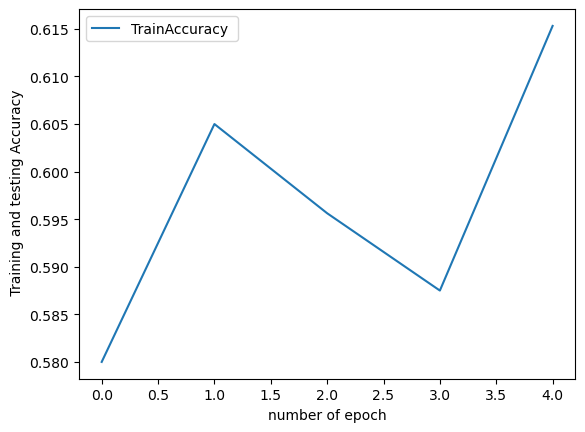

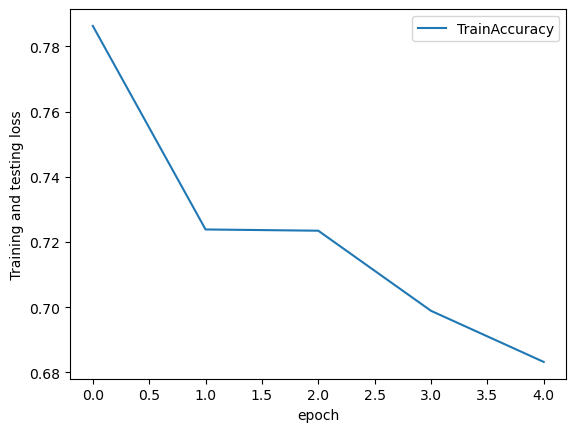

In [272]:
import matplotlib
import matplotlib.pyplot as plt

print(train_history.history.keys())

plt.plot(train_history.history['accuracy'])
plt.ylabel(' Training and testing Accuracy')
plt.xlabel('number of epoch')
plt.legend(['TrainAccuracy ', 'TestAccuracy'], loc='upper left')
plt.show()

plt.plot(train_history.history['loss'])
plt.ylabel(' Training and testing loss ')
plt.xlabel('epoch')
plt.legend(['TrainAccuracy', 'TestAccuracy'], loc='upper right')
plt.show()

In [250]:
#making predictions 

preds = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

43/43 [==============================] - 502s 12s/step


In [251]:
Test = test_set['Tweet']
TestEncoded = regular_encode(Test.astype('str'), tokenizer, maxlen = 128)
TestDataset = (tf.data.Dataset.from_tensor_slices(TestEncoded).batch(BATCH_SIZE))

#making predictions
Preds = model.predict(TestDataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
predClasses = np.argmax(Preds, axis = 1)
predClasses

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

43/43 [==============================] - 492s 11s/step


array([0, 1, 0, ..., 1, 1, 1])

In [266]:
print(accuracy_score(y_test,predClasses))
print(confusion_matrix(y_test,predClasses))
print(classification_report(y_test,predClasses))

0.604075691411936
[[458 394]
 [150 372]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       852
           1       0.49      0.71      0.58       522

    accuracy                           0.60      1374
   macro avg       0.62      0.63      0.60      1374
weighted avg       0.65      0.60      0.61      1374



In [253]:
results = pd.DataFrame()

results['Text'] = test_set['Tweet'].tolist()
results['Label'] = predClasses
results.to_csv('file_5.csv', index = False)
results.head()

Text  Label
0   hrithik ne ekdum gentle rape kiya salute hrithik      0
1  sari duniya hate karti islamic desh nhi hota a...      1
2  baise hi hai kai si aurto ka rape krte waqt ja...      0
3  agar reliancejio relianceent apna broadband la...      1
4  talaq per kanoon badal sakta hai rape per nahi...      0

<b> BERT Model on Large Cased Parameter

In [ ]:
https://daleonai.com/transformers-explained

In [319]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS available: ", strategy.num_replicas_in_sync)

REPLICAS available:  1


In [321]:
def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(texts, return_attention_masks = False, return_token_type_ids = False, pad_to_max_length = True, max_length = maxlen)
    return np.array(enc_di['input_ids'])

In [322]:
#bert large uncased pretrained tokenizer

tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-cased')

In [323]:
#split the data into 70% training and 30% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Label'], random_state = 22, test_size = 0.3)

In [324]:
#tokenizing the tweets' descriptions and converting the categories into one hot vectors using tf.keras.utils.to_categorical

Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 128)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 2, dtype = 'int32')
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 128)
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 2, dtype = 'int32')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword argumen

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

In [325]:
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 2 neurons as the number of unique categories is 2. 
    out = tf.keras.layers.Dense(2, activation = 'relu')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    model.compile(tf.keras.optimizers.Adam(lr = 3e-5), loss = loss, metrics = ['accuracy'])
    return model

In [326]:
#building the model on tpu

with strategy.scope():
    transformer_layer = transformers.TFAutoModel.from_pretrained('bert-large-cased')
    model = build_model(transformer_layer, max_len = 128)
model.summary()

Some layers from the model checkpoint at bert-large-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 128)]            0         
                                                                 
 tf_bert_model_6 (TFBertMode  TFBaseModelOutputWithPoo  333579264
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             128, 1024),                         
                              pooler_output=(None, 10            
                             24),                                
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [327]:
#creating the training and testing dataset.

BATCH_SIZE = 32*strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [328]:
#training for 5 epochs
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 5)

Epoch 1/5
100/100 [==============================] - 3928s 39s/step - loss: nan - accuracy: 0.6506
Epoch 2/5
100/100 [==============================] - 3953s 40s/step - loss: nan - accuracy: 0.6413
Epoch 3/5
100/100 [==============================] - 3867s 39s/step - loss: nan - accuracy: 0.6409
Epoch 4/5
100/100 [==============================] - 6833s 69s/step - loss: nan - accuracy: 0.6478
Epoch 5/5
100/100 [==============================] - 10834s 108s/step - loss: nan - accuracy: 0.6494


In [330]:
score = model.evaluate(Xtest_encoded, ytest_encoded, verbose=0)

In [331]:
print('loss at test:', score[0])
print('accuracy of test:', score[1])

loss at test: nan
accuracy of test: 0.6200873255729675


dict_keys(['loss', 'accuracy'])


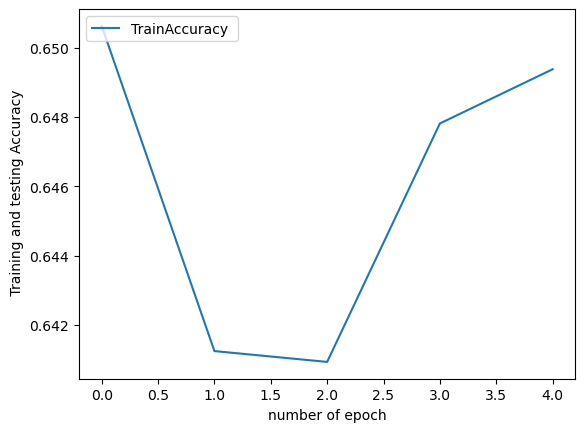

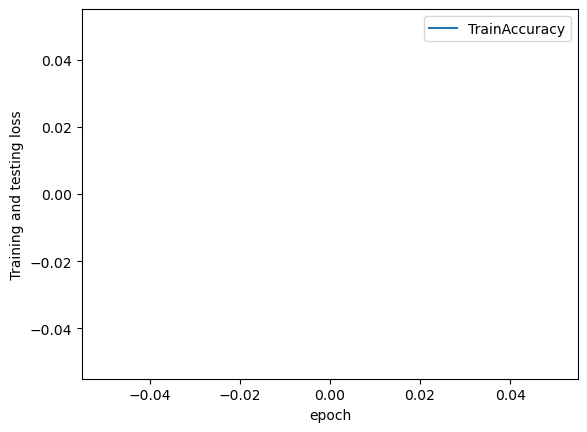

In [332]:
print(train_history.history.keys())

plt.plot(train_history.history['accuracy'])
plt.ylabel(' Training and testing Accuracy')
plt.xlabel('number of epoch')
plt.legend(['TrainAccuracy ', 'TestAccuracy'], loc='upper left')
plt.show()

plt.plot(train_history.history['loss'])
plt.ylabel(' Training and testing loss ')
plt.xlabel('epoch')
plt.legend(['TrainAccuracy', 'TestAccuracy'], loc='upper right')
plt.show()

In [333]:
#making predictions 

prediction = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(prediction, axis = 1)

43/43 [==============================] - 453s 10s/step


In [334]:
Test = test_set['Tweet']
TestEncoded = regular_encode(Test.astype('str'), tokenizer, maxlen = 128)
TestDataset = (tf.data.Dataset.from_tensor_slices(TestEncoded).batch(BATCH_SIZE))

#making predictions
Preds = model.predict(TestDataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
predClasses = np.argmax(Preds, axis = 1)
predClasses

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': Fal

43/43 [==============================] - 452s 11s/step


array([0, 0, 0, ..., 0, 0, 0])

In [335]:
print(accuracy_score(y_test,predClasses))
print(confusion_matrix(y_test,predClasses))
print(classification_report(y_test,predClasses))

0.6200873362445415
[[852   0]
 [522   0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       852
           1       0.00      0.00      0.00       522

    accuracy                           0.62      1374
   macro avg       0.31      0.50      0.38      1374
weighted avg       0.38      0.62      0.47      1374



In [336]:
results = pd.DataFrame()

results['Text'] = test_set['Tweet'].tolist()
results['Label'] = predClasses
results.to_csv('file_6.csv', index = False)
results.head()

Text  Label
0   hrithik ne ekdum gentle rape kiya salute hrithik      0
1  sari duniya hate karti islamic desh nhi hota a...      0
2  baise hi hai kai si aurto ka rape krte waqt ja...      0
3  agar reliancejio relianceent apna broadband la...      0
4  talaq per kanoon badal sakta hai rape per nahi...      0